# <img src="http://drive.google.com/uc?export=view&id=1FOHQtxwXKjBf8E6eAR3Jdgm7kwFnv1Nc" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Merkle tree   
* Introduction
* Python Implementation    
* How merkle tree helps in Bitcoin
</font>  

## <font color='blue'> DodoCoin Implementation  
* Classes Details
* Flow diagram
* Python implementation
</font>    

## Merkle Tree

<font size=4> Introduction  </font>

Each block in a bitcoin blockchain, has a placeholder, which contains the summary (digital fingerprint) of all the transactions recorded in a block. This is done using a ***merkle tree.***   
It is also known as ***binary hash tree.*** This tree contains cryptographic hashes.  
In bitcoin blockchain, the summary is used to verify whether a particular transaction is included in a block or not.  

A merkle tree is constructed hashing pairs of nodes recursively until there is one has remaining. It is called ***merkle root.***  
In bitcoin blockchain, SHA256 algorithm is used to generate a hash in the merkle tree. It is applied twice. It is also known as ***double-SHA256***

Following is a pictorial representation of the same... 

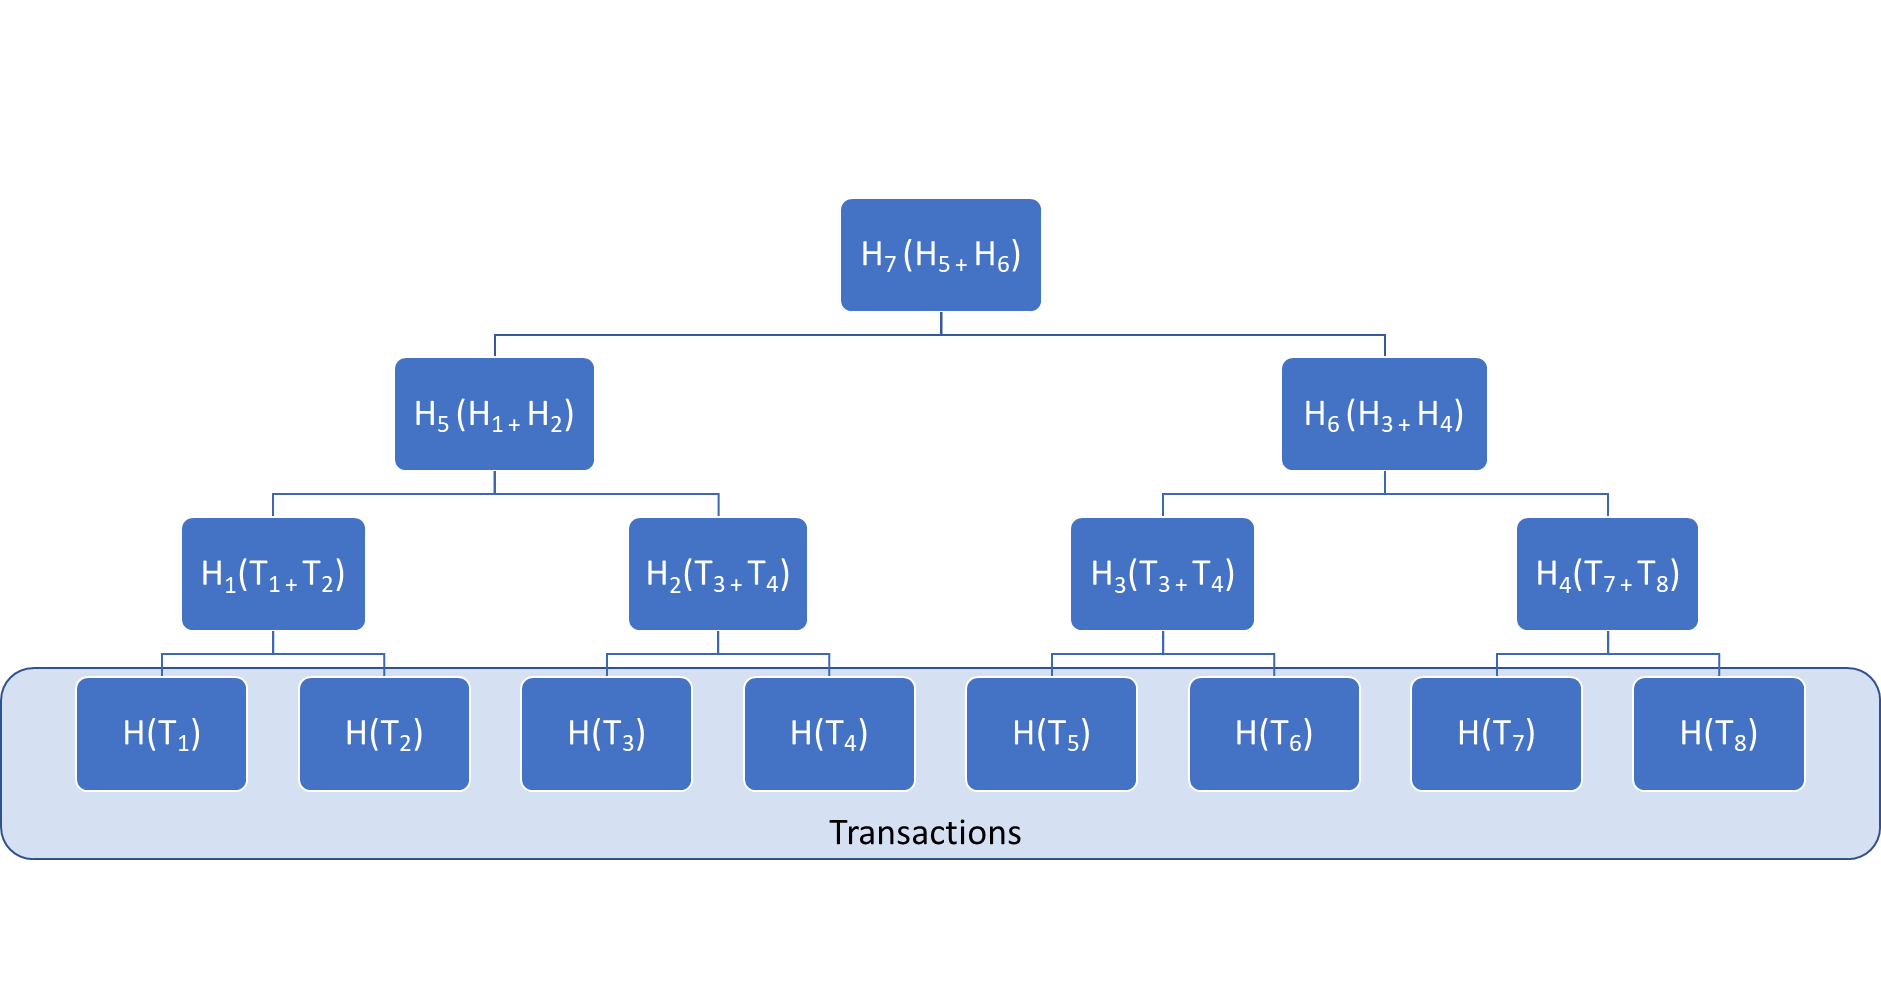

<font size=4> Python Implementation  </font>

In [40]:
def create_hash_list(transactions):
    new_hash_list = []
    for index in range(len(transactions)):
        
        # Following statement computes single hash
        x = hashlib.sha256(transactions[index].encode()).hexdigest() 
        
        # Use the following statement to calculate the double hash
        # x = hashlib.sha256(x.encode()).hexdigest()
        
        new_hash_list.append(x)
        print(f"{transactions[index]} - {new_hash_list[index]}")
        
    return new_hash_list

def create_merkle(hash_list, transactions):
    if not hash_list:
        print("Empty list")
        return None
    
    if len(hash_list) == 1:
        return hash_list[0]
    
    while len(hash_list) > 1:
        new_hash_list = []
        new_transactions_list = []
        # Make number of entries even in the list
        if len(hash_list) %2 != 0:
            hash_list.append(hash_list[-1])
            transactions.append(transactions[-1])

        counter = 0
        for index in range(0, len(hash_list), 2):
            concatenated_transactions = transactions[index] + "+" + transactions[index+1]
            new_transactions_list.append(concatenated_transactions)
            
            concatenated_hash = hash_list[index] + hash_list[index+1]
            new_hash_list.append(hashlib.sha256(concatenated_hash.encode()).hexdigest())
            print(f"{new_transactions_list[counter]} - {new_hash_list[counter]}")
            counter += 1


        hash_list = new_hash_list
        transactions = new_transactions_list
        print()
    
    return hash_list[0]
    
transactions = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
hash_list = create_hash_list(transactions)
print()
merkle_root = create_merkle(hash_list, transactions)    
print(merkle_root)

1 - 6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b
2 - d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35
3 - 4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce
4 - 4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a
5 - ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d
6 - e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683
7 - 7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451
8 - 2c624232cdd221771294dfbb310aca000a0df6ac8b66b696d90ef06fdefb64a3
9 - 19581e27de7ced00ff1ce50b2047e7a567c76b1cbaebabe5ef03f7c3017bb5b7
10 - 4a44dc15364204a80fe80e9039455cc1608281820fe2b24f1e5233ade6af1dd5

1+2 - 33b675636da5dcc86ec847b38c08fa49ff1cace9749931e0a5d4dfdbdedd808a
3+4 - 13656c83d841ea7de6ebf3a89e0038fea9526bd7f686f06f7a692343a8a32dca
5+6 - 43587f59c00a8e528bc7636fabaffcf70cc25afc5b4d53df797faf0dc72f6dd0
7+8 - ada17dcc2d615cc0d982a538b618f45441e798c38b1df9f3dd273e386eba1363
9+10 - 76d4c0b6f7f7cc712

The function ```create_hash_list()``` is written to demonstrate the creation of hash using a byte stream. It also demonstrates how we can calculate ***double-SHA256*** as well. 

The function ```create_merkle()``` is written to create  

The above code shows the simulation of calculations of merkle tree using the transactions recorded in a block.   
***Note:*** the only intention of passing *transactions* as a parameter to the function ***create_merkle*** is to display how the merkle tree is calculated.

<font size=4> How merkle tree helps in Bitcoin  </font>

To understand how merkle tree helps in Bitcoin network, we first understand / review a few terms.  
***Transaction:*** - A transaction, in bitcoin network is movement of bitcoins from one address to another address. This information is digitally signed.   

***UTXO:*** Unspent Transaction output. It is a balance of digital currency that remains after a transaction completes. Consider this as a balance that remains when you spend Rs.60 out of Rs.100  

***Note:*** - In case of Bitcoin, suppose I have received 10 BTC and in a transaction I give 4 BTC to another person, then I have to give the remaining 6 BTC to myself. The ***input*** of 10 BTC ***must match*** with the ***output***  4 + 6 = 10.  

Following is an example that shows how transactions are managed. Notice how for each transaction the input and the output is the same.

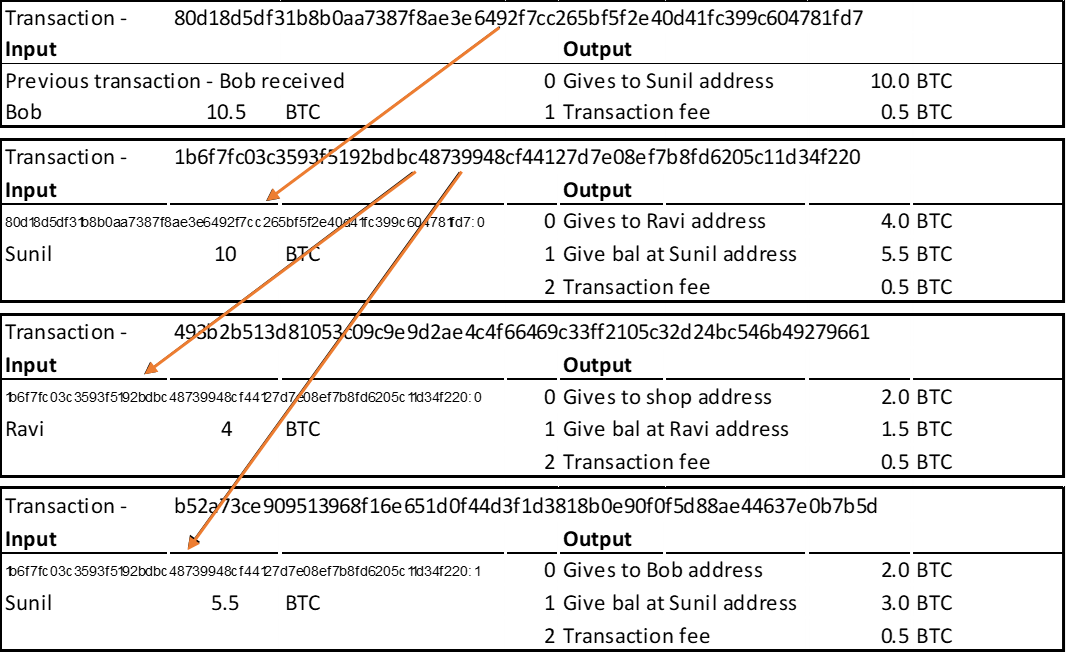

Now, a block has a set of transactions and from these transactions, a ***merkle root*** is calculated.   
Whenever a new transaction occurs, bitcoin network has to verify to whether a user has enough BTC that he / she intends to spend. If yes, then the transaction is verified and pushed to mem-pool. Otherwise the transaction is not validated.  
And it is not feasible to check all the previous entries of the ledge to validate a transaction.  
***Note:*** there is no concept of ***balance*** maintained in blockchain network. The way we see in our bank account statements.  
To speed up the validation process, the blocks of ***input*** side are queried to verify the merkle root. This gives enough proof that a transaction does exist.  

So, when the last transaction is verified, the node will query for the the block that contains the transaction mentioned in the ***input*** part of the transaction.  

 ***Note*** - partial nodes, that do not maintain a complete copy of the blockchain ledger, use this technique of verification.

## DodoCoin Implementation

Based on the various concepts we have learned so far, we will now do a basic implementation of our own cryptocurrency and we call it DoDoCoin.   
This implementation will help you understand the conceptual implementation of the following... 
1. Creating a wallet. Managing private and public keys.  
2. Initiating a transaction using a wallet.  
3. Structure of a block. How to generate hash of a block.
4. How to digitally sign and verify a transaction initiated by a user
5. How a node pulls transactions and creates a candidate block
6. Generate hash of a candidate block and add it to the chain.

It has the following classes...   

<font size=4> Class Explanation  </font>

***Wallet (wallet.py)*** - For every user who wishes to do transactions on this block-chain network, will have to have a wallet to initiate a transaction.  
Whenever a user gets a wallet, the wallet class will ensure that a private and public key is generated for a user.  

For ease of doing transactions, whenever a user gets a wallet, a user also gets 100 DoDoCoins.  
*In a real world scenario, however a user has to either purchase these coins or exchanges these for any product or service.*   

How do we associate a wallet with a user? Each instance of a class Wallet will be considered as a user.  
*Again, for convenience, we will store user name as well while creating an object of a wallet. This will help in better understanding of a flow. In real life scenario all the dealings will happen based on the generated keys.*

While creating an instance of a wallet, we also associate this wallet with a cryptocurrency DodoCoin. We do this by registering a user with the class ***DodoCoin***. It is done by calling the function ```DodoCoin.register()```. *A wallet object is aware of this function.*  
Class ***Node*** will use this information to validate both an incoming transaction and the receiver of a transaction.

This class will provide the following functionality.
* Generate a private and public key. User will use this for initiating transactions.
* A user will use the wallet to initiate a new transaction. The transaction will be ***digitally signed*** before it is sent to ***DodoCoin*** for inclusion in ***mem pool***

***Block (block.py)*** - This class will represent a block of the DoDoCoins blockchain. The responsibility of creating a new block is with the class ***Blockchain.*** Each block will contain the following information...  
* ***Index***: The position of the block in the block-chain starting with 0 for the genesis block. Class Blockchain will provide this information
* ***Time stamp***: Time when this block is created. Class Block will provide this information, when a new block is created. 
* ***Previous block hash***: Hash of the previous block, Class Blockchain will provide this information.
* ***Metadata***: Any generic textual information added in the block (Optional). By default this will be an empty string. We are using this as a placeholder. When required class Blockchain will provide this information. 
* ***Merkle_root***: is the merkle hash of all the transactions. It will be calculated using the transactions included in a block
* ***Nonce***: A random number that is used to arrive at a hash value that satisfies the difficulty level of a block. *This is just a placeholder at this point of time.*  
* ***Difficulty level***: Indicates the difficulty level or a condition a block hash must satisfy. *This is just a placeholder at this point of time.*  

All the above information is considered as ***Header*** information
* ***Block_hash***: Hash of the current block. This will be generated using the ***header*** data
* ***Transactions***: List of transactions included in the block.   

This class will provide the following functionality.  
* All the data in the class is divided in two parts. Header and transaction data. 
* It implements a function ```Block.generate_hash()``` that generates a hash for this block.  
* It implements a functionality ```Block._generate_merkle_root()``` to generate a ***merkle root*** of all the transactions included in the block.  

***Note:*** While generating a ***block hash*** a number of preparatory activities are done,  
* Combine all the header information in one string. 
* Convert this string to byte stream.
* Generate the hash value using this byte stream.

<div class="alert alert-block alert-info">
If we do not do this formatting, then it will not be easy to regenerate the hash of a block. <br>
    <i>Regeneration of hash is generally done to validate the hash value of a block</i>
</div>

***DodoCoin (blockchain.py)*** - This class is the starting point of the blockchain. When an object of this class is created, it creates the very first block, the ***genesis block.***  
It is an interaction point between the wallets and nodes.   
It maintains the list of transactions yet to be added in a block, in the form of a list ***mem_pool.***  
It maintains all the wallets that have been created, in the form of a dictionary ***wallets.*** With an intention of ease of use while verifying a receiver of a transaction.  



***Node (node.py) -*** This class is responsible for creating new block and maintains a ***blockchain.***    
When a new node object is created, it will gather the details of ***genesis block*** from an object the class ***DodoCoin.***  
A ***Node*** object receives an object of class ***Dodocoin*** as a parameter at the time of its creation.   
It provides a function ```Node.create_new_block```, this function pulls all the pending transactions and creates a new block.  
It also ensures that block hash is generated and finally the new block is added to a chain. It is maintained in the form of a list ***_chain***  
It also provides a function ```Node.add_new_transaction```, a ***wallet*** uses this function to pass on a new transaction. The ***Node*** validates the transaction and then adds this to the ***mem_pool*** 

<font size=4> Flow Diagram  </font>

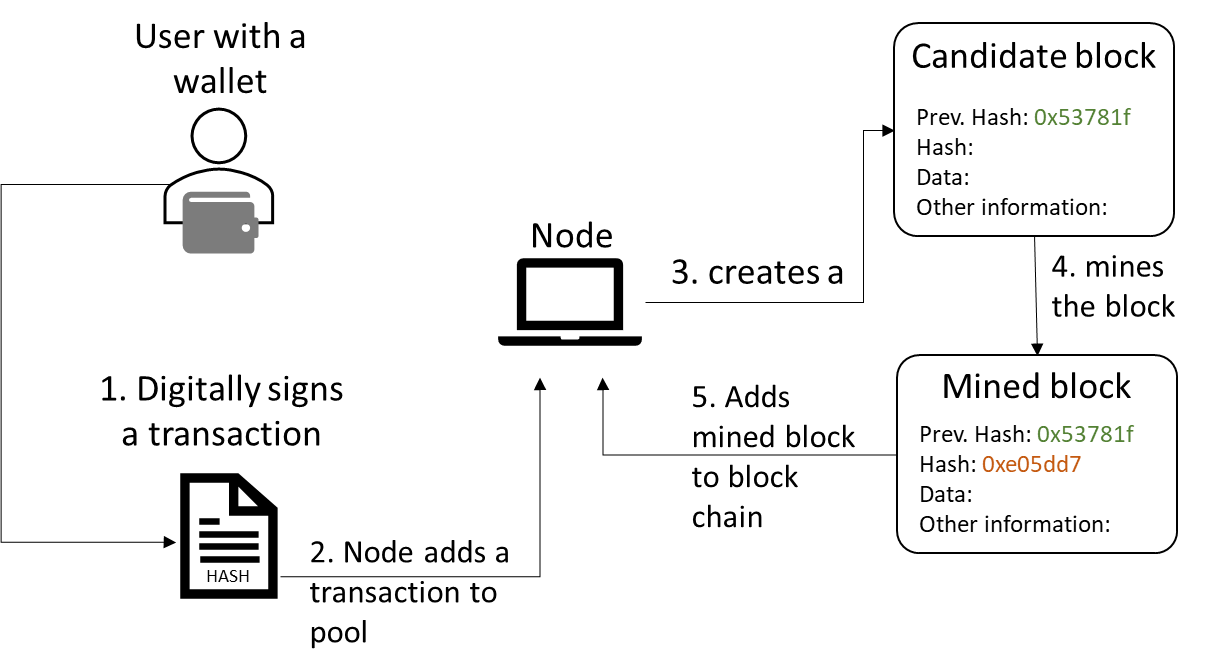

<div class="alert alert-block alert-info">
<b><i>Note: </i></b> the code below has been written with an intention of explaining the implementation of blockchain. <br>
And to make this explanation easy to understand, it has not been written in modular way.    
</div>

<font size=4> Source Code  </font>

The code below has been tested only on PyCharm. I recommend you to use the same.  
In order to run this code you must install ```cryptography``` package.  
The code is shared here for understanding / explanation purpose.  
The code below, has been changed to make it work on Jupyter notebook as well.   
<div class="alert alert-block alert-warning">
<b><i>Note: </i></b> To make the code run, execute each cell in the sequence. <br>
    All the import statements have been commented.
</div>


Execute the following statement to install ```cryptography``` in Jupyter notebook

In [ ]:
! pip install cryptograpy

<font size=3> Wallet.py  </font>

In [2]:
import json

from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding


class Wallet:
    def __init__(self, user):
        self.user = user
        self.__private_key = ''
        self.public_key = ''
        self.__generate_keys()

    def __generate_keys(self):
        self.__private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
        self.public_key = self.__private_key.public_key()

    def initiate_transaction(self, receiver, coins):
        transaction = {'sender': self.user, "receiver": receiver, "coins": coins}

        # This function digitally signs a transaction.
        # This has the following steps
        # 1. We convert the dictionary which contains transaction details to a string
        # For this we convert this to a JSON string.
        transaction_jsonified = json.dumps(transaction)
        # print(transaction_jsonified)
        # 2. Change this string to a byte stream. Call the function encode() to encode the string in utf-8 format
        transaction_jsonified_to_bytes = transaction_jsonified.encode()
        # print(transaction_jsonified_to_bytes)
        # 3. Digitally sign the transaction
        signature = self.__private_key.sign(transaction_jsonified_to_bytes,
                                            padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                        salt_length=padding.PSS.MAX_LENGTH),
                                            hashes.SHA256())
        # 4. Structure the information and pass is back to the caller.
        # This structure will be passed to node for verification.
        # On successful verification, this transaction will be added to the mem_pool
        # a. Sender details. We will use this to pick the public key of sender and validate the transaction
        # b. Signature. Of the transaction
        # c. transaction. Here we are sending transaction data as plain text

        new_transaction = {'sender': self.user,
                           "signature": signature,
                           "transaction_bytes": transaction_jsonified_to_bytes}
        return new_transaction

<font size=3> Block.py  </font>

In [6]:
import time
import hashlib
import json


class Block:
    def __init__(self, index, transactions, previous_block_hash, difficulty_level=1, metadata=''):
        self._index = index
        self._timestamp = time.time()
        self._previous_block_hash = previous_block_hash
        self._metadata = metadata
        self._merkle_root = ''
        self._nonce = 0
        self._difficulty_level = difficulty_level
        self._block_hash = ''
        self._transactions = transactions

    def __str__(self):
        return f'\nBlock index: {self._index}' \
               f'\nTimestamp: {self._timestamp}' \
               f'\nPrevious Block Hash: {self._previous_block_hash}' \
               f'\nMetadata: {self._metadata}' \
               f'\nmerkle root: {self._merkle_root}' \
               f'\nNonce: {self._nonce}' \
               f'\nDifficulty level: {self._difficulty_level}' \
               f'\nBlock Hash: {self._block_hash}' \
               f'\nTransactions: {self._transactions}'

    def __repr__(self):
        return self.__str__()

    @property
    def block_hash(self):
        return self._block_hash

    def generate_hash(self):
        self._merkle_root = self._generate_merkle_root()

        hash_string = ''.join([
            str(self._index),
            str(self._timestamp),
            str(self._previous_block_hash),
            str(self._metadata),
            str(self._merkle_root),
            str(self._nonce),
            str(self._difficulty_level)
        ])
        encoded_hash_string = hash_string.encode('utf-8')
        hash_value = hashlib.sha256(encoded_hash_string).hexdigest()
        self._block_hash = hash_value

    def _generate_merkle_root(self):
        hash_list = self._create_hash_list(self._transactions)
        return self._create_merkle(hash_list, self._transactions)

    def _create_hash_list(self, transactions):
        new_hash_list = []
        for transaction in transactions:
            transaction_jsonified = json.dumps(transaction)
            x = hashlib.sha256(transaction_jsonified.encode()).hexdigest()
            new_hash_list.append(x)

        return new_hash_list

    def _create_merkle(self, hash_list, transactions):
        if not hash_list:
            print("No transactions. Genesis block. No Merkle root.")
            return None

        if len(hash_list) == 1:
            return hash_list[0]

        while len(hash_list) > 1:
            new_hash_list = []
            # new_transactions_list = []
            # Make number of entries even in the list
            if len(hash_list) % 2 != 0:
                hash_list.append(hash_list[-1])
                # transactions.append(transactions[-1])

            counter = 0
            for index in range(0, len(hash_list), 2):
                # concatenated_transactions = transactions[index] + "+" + transactions[index + 1]
                # new_transactions_list.append(concatenated_transactions)

                concatenated_hash = hash_list[index] + hash_list[index + 1]
                new_hash_list.append(hashlib.sha256(concatenated_hash.encode()).hexdigest())
                # print(f"{new_transactions_list[counter]} - {new_hash_list[counter]}")
                counter += 1

            hash_list = new_hash_list
            # transactions = new_transactions_list
            # print()

        return hash_list[0]

<font size=3> Blockchain.py  </font>

In [3]:
# from dodocoin_2.block import Block


class DodoCoin:
    def __init__(self):
        self.mem_pool = []
        self._genesis_block = None
        self.wallets = {}
        self.__create_genesis_block()


    def __create_genesis_block(self):
        self._genesis_block = Block(index=0, transactions=[], previous_block_hash=0, difficulty_level=1,
                              metadata='The Times 03/Jan/2009 Chancellor on brink of second bailout for banks Genesis '
                                       'block using same string as bitcoin!')
        self._genesis_block.generate_hash()

    @property
    def genesis_block(self):
        return self._genesis_block

    def register_wallet(self, friendly_name, public_key):
        self.wallets[friendly_name] = public_key

    def list_wallets(self):
        for key, value in self.wallets.items():
            print(f"{key} - {value}")

    def list_pending_transactions(self):
        for transaction in self.mem_pool:
            print(transaction)

<font size=3> Node.py  </font>

In [4]:
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import hashes
from cryptography.exceptions import InvalidSignature
import json

# from dodocoin_2.block import Block


class Node:
    def __init__(self, dodocoin):
        self.cryptocurrency = dodocoin
        self._chain = []
        self._get_chain()

    def _get_chain(self):
        self._chain.append(self.cryptocurrency.genesis_block)

    def __str__(self):
        return f'Chain:\n{self._chain}'

    def create_new_block(self):
        new_block = Block(index=len(self._chain), transactions=self.cryptocurrency.mem_pool,
                          previous_block_hash=self._chain[-1].block_hash, metadata='')

        new_block.generate_hash()
        self._chain.append(new_block)
        self.cryptocurrency.mem_pool = []
        return new_block

    def show_chain(self):
        for chain_block in self._chain:
            print(chain_block)

    def add_new_transaction(self, transaction):
        try:
            self._validate_transaction(transaction)
        except InvalidSignature as e:
            print("Invalid signature. Cannot add this transaction")
            return

        if self._validate_receiver(transaction):
            transaction_bytes = transaction['transaction_bytes']
            transaction_data = json.loads(transaction_bytes)
            self.cryptocurrency.mem_pool.append(transaction_data)

    def _validate_transaction(self, transaction):
        sender_public_key = self.cryptocurrency.wallets[transaction['sender']]
        signature = transaction['signature']
        transaction_bytes = transaction['transaction_bytes']
        sender_public_key.verify(signature, transaction_bytes,
                                 padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH),
                                 hashes.SHA256())

    def _validate_receiver(self, transaction):
        transaction_bytes = transaction['transaction_bytes']
        transaction_data = json.loads(transaction_bytes)
        # print(transaction_data)
        if transaction_data['receiver'] in self.cryptocurrency.wallets:
            return True
        return False
    

<font size=3> Driver_code.py  </font>

In [7]:
# from dodocoin_2.blockchain import DodoCoin
# from dodocoin_2.wallet import Wallet
# from dodocoin_2.node import Node

dodo = DodoCoin()

node_1 = Node(dodo)

peter_wallet = Wallet('Peter')
tony_wallet = Wallet('Tony')
strange_wallet = Wallet('Strange')
bruce_wallet = Wallet('Bruce')
steve_wallet = Wallet('Steve')
carol_wallet = Wallet('Carol')
scarlet_wallet = Wallet('Scarlet')
# nebula_wallet = Wallet('Nebula')
# natasha_wallet = Wallet("Natasha")
# shuri_wallet = Wallet('Shuri')

# Register each wallet with Blockchain
dodo.register_wallet(peter_wallet.user, peter_wallet.public_key)
dodo.register_wallet(tony_wallet.user, tony_wallet.public_key)
dodo.register_wallet(strange_wallet.user, strange_wallet.public_key)
dodo.register_wallet(bruce_wallet.user, bruce_wallet.public_key)
dodo.register_wallet(steve_wallet.user, steve_wallet.public_key)
dodo.register_wallet(carol_wallet.user, carol_wallet.public_key)
dodo.register_wallet(scarlet_wallet.user, scarlet_wallet.public_key)
# dodo_chain.register_wallet(nebula_wallet.user, nebula_wallet.public_key)
# dodo_chain.register_wallet(natasha_wallet.user, natasha_wallet.public_key)
# dodo_chain.register_wallet(shuri_wallet.user, shuri_wallet.public_key)

# Show list of registered wallets.
print("\nList of registered wallets.")
dodo.list_wallets()

transaction = peter_wallet.initiate_transaction(tony_wallet.user, 20)
node_1.add_new_transaction(transaction)
print("\nList of pending transactions.")
dodo.list_pending_transactions()
node_1.create_new_block()


transaction = peter_wallet.initiate_transaction(bruce_wallet.user, 25)
node_1.add_new_transaction(transaction)
transaction = bruce_wallet.initiate_transaction(peter_wallet.user, 50)
node_1.add_new_transaction(transaction)
transaction = tony_wallet.initiate_transaction(bruce_wallet.user, 50)
node_1.add_new_transaction(transaction)
node_1.create_new_block()

transaction = scarlet_wallet.initiate_transaction(peter_wallet.user, 25)
node_1.add_new_transaction(transaction)
transaction = carol_wallet.initiate_transaction(steve_wallet.user, 50)
node_1.add_new_transaction(transaction)
transaction = steve_wallet.initiate_transaction(bruce_wallet.user, 50)
node_1.add_new_transaction(transaction)

node_1.create_new_block()
print("\nPrinting blockchain.")
node_1.show_chain()


No transactions. Genesis block. No Merkle root.

List of registered wallets.
Peter - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4C22470>
Tony - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E281C0>
Strange - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E28EB0>
Bruce - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E293C0>
Steve - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E295A0>
Carol - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E297B0>
Scarlet - <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x000001ACA4E29990>

List of pending transactions.
{'sender': 'Peter', 'receiver': 'Tony', 'coins': 20}

Printing blockchain.

Block index: 0
Timestamp: 1658472435.023942
Previous Block Hash: 0
Metadata: The Times 03/Jan/2009 Chancellor on brink of second bailout for banks Genesis 